In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Olympic Athlete Data Analysis

In this analysis, we will explore the Olympic athlete dataset. The dataset contains information about athletes who participated in the Olympics, including their age, height, weight, gender, nationality, and the medals they won. We will clean the data, visualize key trends, and analyze the medal distribution.

Let's start by loading the dataset and checking for missing values.



In [4]:
df = pd.read_csv('athlete_events 2.csv')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Data Cleaning

The dataset contains missing values for certain attributes like `Age`, `Weight`, and `Height`. We will fill these missing values with the mean of the respective columns to ensure we can continue with our analysis without biasing the results.


In [19]:
df.info()
df.isnull().sum()

df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Weight'].fillna(df['Weight'].mean(),inplace=True)
df['Height'].fillna(df['Height'].mean(),inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Gender Distribution

Let's begin by analyzing the distribution of genders in the dataset. This will help us understand the gender ratio of Olympic athletes over the years.



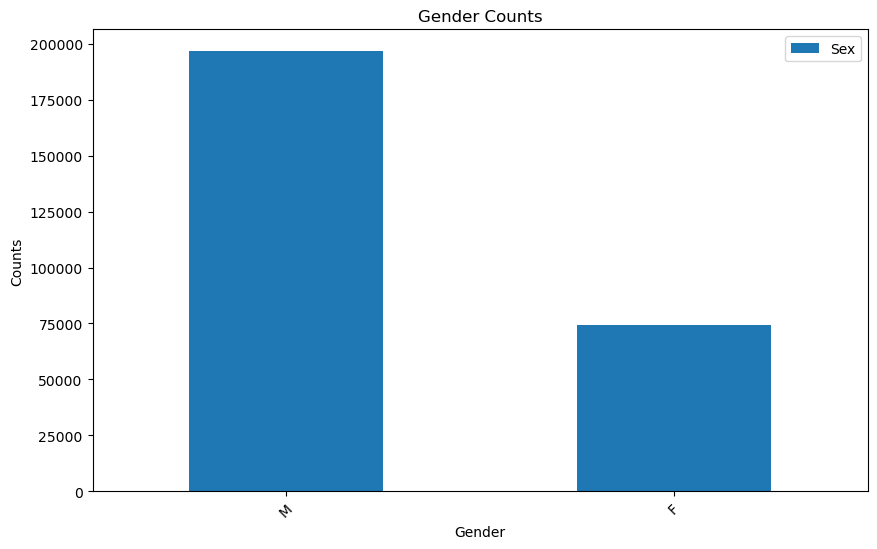

In [21]:
plt.figure(figsize=(10,6))
df['Sex'].value_counts().plot(kind='bar',title='Gender Counts')
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend()

plt.show()

## Age Distribution of Olympic Athletes

Age plays a significant role in the performance of athletes. Here, we will visualize the distribution of ages to understand the age range of participants in the Olympics.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


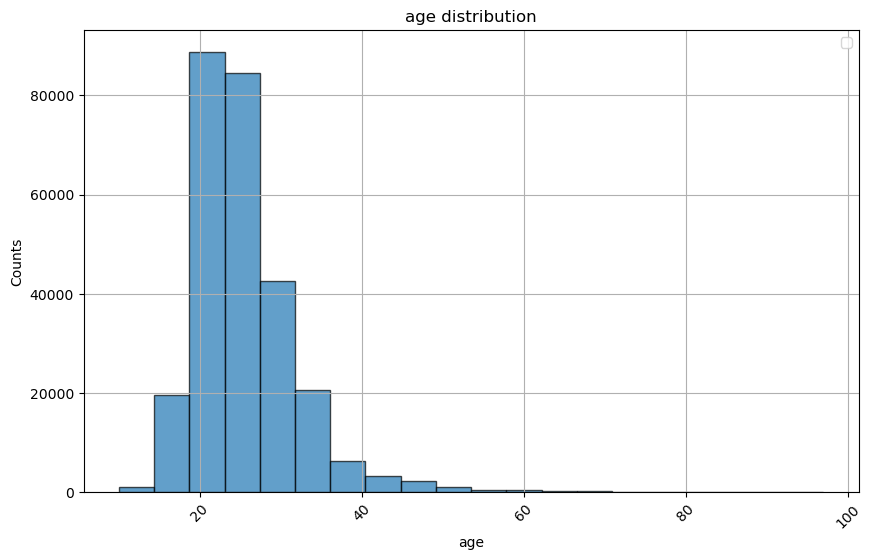

In [22]:
plt.figure(figsize=(10,6))
df['Age'].hist(bins=20,edgecolor='black',alpha=0.7)
plt.xticks(rotation=45)
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('Counts')
plt.legend()

plt.show()

## Boxplot for Weight and Height
The purpose of  code is to create a boxen plot to visualize the distribution of Height and Weight from  dataset.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200'),
  Text(0, 225.0, '225'),
  Text(0, 250.0, '250')])

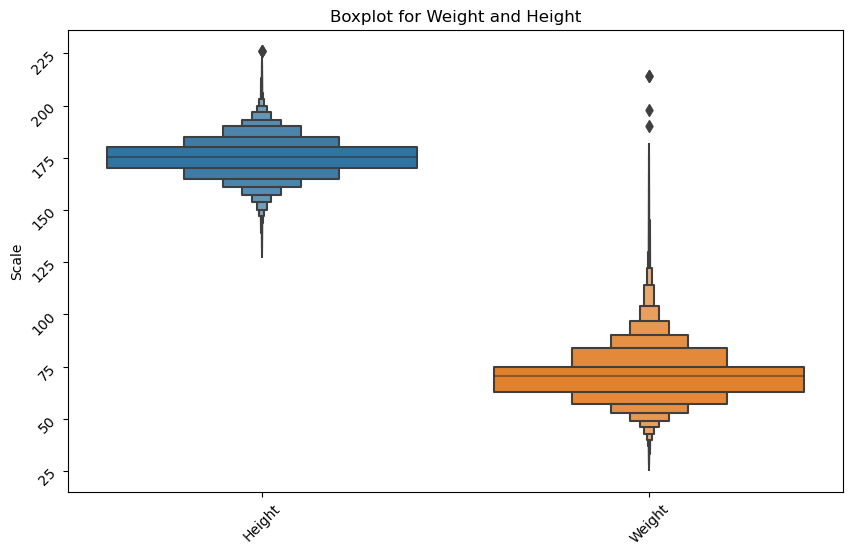

In [30]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df[['Height','Weight']])
plt.title('Boxplot for Weight and Height')
plt.xticks(rotation=45)
plt.ylabel('Scale')
plt.yticks(rotation=45)



## Top 10 Countries by Medal Count

Next, let's look at the countries that have won the most medals in the Olympic Games. We'll plot a bar chart showing the top 10 countries by total number of medals.


<Axes: xlabel='NOC'>

<Figure size 1200x800 with 0 Axes>

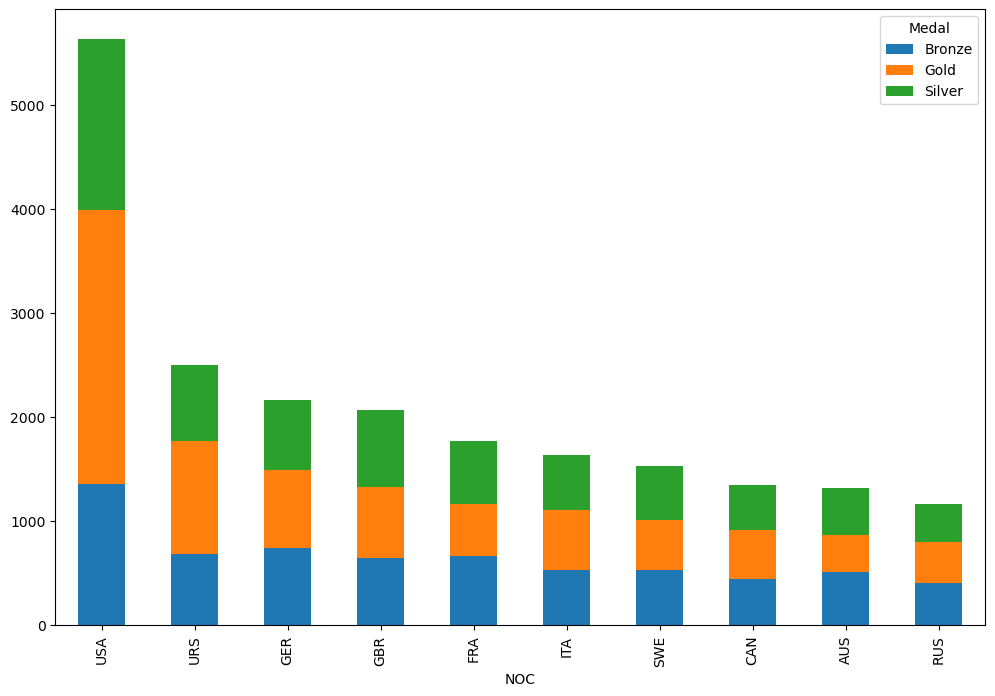

In [47]:
medal_count_by_coutry = df.groupby(['NOC','Medal']).size().unstack(fill_value=0)
medal_count_by_coutry['Total'] = medal_count_by_coutry.sum(axis=1)
medal_count_by_coutry = medal_count_by_coutry.sort_values(by='Total',ascending=False)
top_10_countries = medal_count_by_coutry.head(10)

plt.figure(figsize=(12,8))
top_10_countries.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(12, 8))

## Medal Distribution by Country:
first sort the countries by gold medals to get the top 10 countries.
The stacked bar chart is created using the counts of Gold, Silver, and Bronze medals for the top 10 countries.

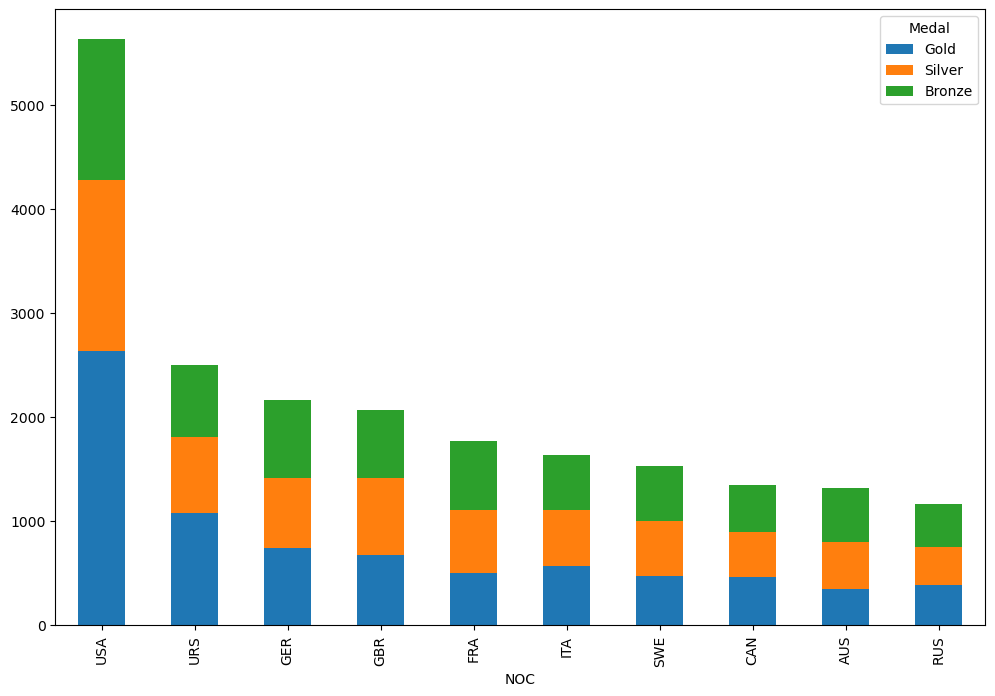

In [53]:
top_countries = medal_count_by_coutry.sort_values(by="Gold",ascending=False).head(10)
top_10_countries[["Gold","Silver","Bronze"]].plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Medal distributtion by country')
plt.show()


## Medal Distribution by Sports:

group the data by Sport and Medal and unstack the medal counts.
Then, calculate the total number of medals for each sport and sort them to get the top 10 sports.
Finally, we plot the stacked bar chart for the top 10 sports.

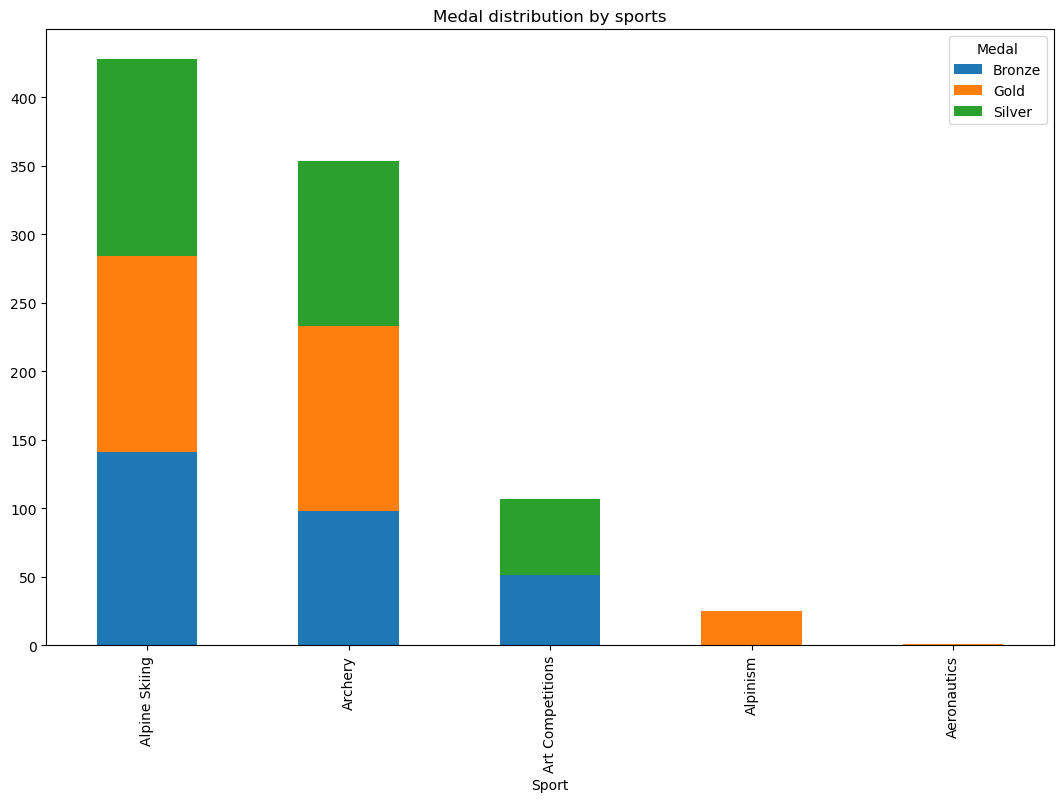

In [60]:
medal_count_by_sports = df.groupby('Sport')['Medal'].value_counts().head(10).unstack(fill_value=0)
medal_count_by_sports['Total'] = medal_count_by_sports.sum(axis=1)
medal_count_by_sports = medal_count_by_sports.sort_values(by='Total',ascending=False)
medal_count_by_sports = medal_count_by_sports.drop(columns='Total')
medal_count_by_sports.plot(kind='bar',stacked=True,figsize=(13,8))
plt.title('Medal distribution by sports')
plt.show()

## Medals Over Time by Top 15 Countries

Finally, let's explore how the medal counts have evolved over time for the top 15 countries. This visualization will show the performance trends of these countries across different Olympic events.


<Figure size 1500x800 with 0 Axes>

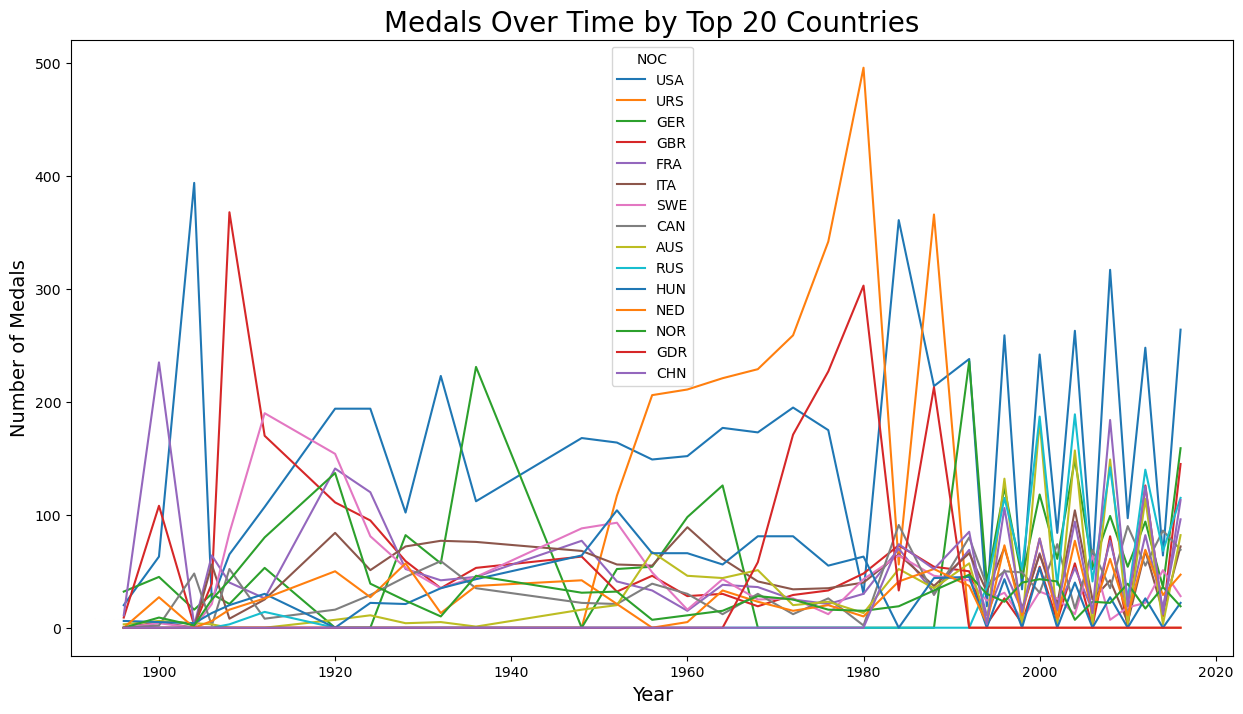

In [74]:

df_medals = df[df['Medal'].notna()]
medals_over_time = df_medals.groupby(['Year', 'NOC'])['Medal'].count().unstack().fillna(0)
total_medals_by_country = medals_over_time.sum(axis=0)
top_20_countries = total_medals_by_country.nlargest(15).index
medals_over_time_top_20 = medals_over_time[top_20_countries]

plt.figure(figsize=(15, 8))
medals_over_time_top_20.plot(figsize=(15, 8))
plt.title('Medals Over Time by Top 20 Countries', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)

plt.show()


## Conclusion

Through this analysis, we explored various aspects of the Olympic athlete dataset. We examined the gender distribution, age distribution, top-performing countries, and how medal counts have changed over time. The trends revealed interesting insights into global sports competition and the participation of athletes from various countries.

Further analysis could involve exploring individual sports, performance by age groups, or comparing athletes by their physical attributes.
